In [4]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import metrics
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

read from CSV


In [5]:
headers = ["x1","x2"]
train_x = pd.read_csv('/Users/xtarx/Documents/TUM/4th/MLMA/ex2-svm/twomoons/xtrain.cvs',names=headers)
headers = ["y"]
train_y = pd.read_csv('/Users/xtarx/Documents/TUM/4th/MLMA/ex2-svm/twomoons/ytrain.cvs',names=headers)
train=pd.concat([train_x, train_y], axis=1)

headers = ["x1","x2"]
test_x = pd.read_csv('/Users/xtarx/Documents/TUM/4th/MLMA/ex2-svm/twomoons/xtest.cvs',names=headers)
headers = ["y"]
test_y = pd.read_csv('/Users/xtarx/Documents/TUM/4th/MLMA/ex2-svm/twomoons/ytest.cvs',names=headers)
test=pd.concat([test_x, test_y], axis=1)

In [6]:
train.tail()
# test.tail()

,x1,x2,y
495,1.464900,0.17000,2
496,0.051546,0.18463,2
497,-0.112310,0.55191,2
498,2.215500,0.53493,2
499,0.458270,0.52203,2


In [7]:
def visualize(x, y):
    for counter, i in test_x.iterrows():
        if np.asscalar(y[counter]) == 1:
            c1 = pl.scatter(i["x1"], i["x2"], c='r', marker='+')
        elif np.asscalar(y[counter]) == 2:
            c2 = pl.scatter(i["x1"], i["x2"], c='g', marker='o')

    pl.legend([c1, c2], ['Class 1', 'Class 2'])
    pl.title('TwoMoons dataset.... with 2 classes')
    predictions,test_accuracy,test_report=svm_predict(trained_model,x,y)
    # Z = predictions.reshape(x.shape)
    # Z.shape()
    # pl.contour(x, y, Z)
    # pl.title('Support Vector Machine Decision Surface')
    # pl.axis('off')
    pl.show()

In [38]:
def get_performance(labels,predicted_labels):
    cm = confusion_matrix(labels, predicted_labels)
    tn = float(cm[1][1])/np.sum(cm[1])
    # metrics["FPR"] = 1-tn
    
    dict={
        "accuracy":accuracy_score(labels, predicted_labels),
        "recall":recall_score(labels, predicted_labels),
        "precision":precision_score(labels,predicted_labels),
        "FPR":precision_score(labels,predicted_labels),
          
          }
    return dict

In [39]:
def svm_fit(X,y,kernel_type):
    clf =  svm.SVC(kernel=kernel_type)
    clf.fit(X, y)  
    pred=clf.predict(X)
    performance=get_performance(y,pred)
    # return clf,(accuracy_score(y,pred,normalize=True)),(metrics.classification_report(y, pred))
    return clf,performance

In [40]:
df = pd.DataFrame(train)
train_x=df[['x1','x2']].as_matrix()
train_y=df[['y']].as_matrix()

trained_model,train_report=svm_fit(train_x,train_y.ravel(),'linear')

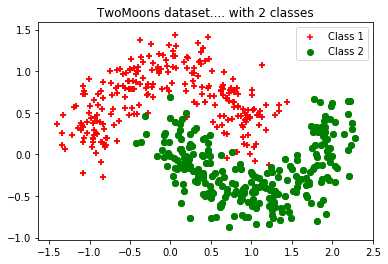

In [14]:
# np.asscalar(train_y[1])
visualize(train_x,train_y)

In [41]:
def svm_predict(trained_model, X, y):
    pred = trained_model.predict(X)
    performance = get_performance(y, pred)
    # return clf,(accuracy_score(y,pred,normalize=True)),(metrics.classification_report(y, pred))
    return pred, performance
    # return pred,(accuracy_score(y,pred,normalize=True)),(metrics.classification_report(y, pred))

Create a function svm_predict receiving the model trained above, a matrix Xt of samples
for testing and their expected outcomes yt
. The function should return a vector of predicted
outcomes and and a structure with the performance (including the accuracy, recall, FPR and
precision) on the testing samples.

In [42]:
predictions,test_report=svm_predict(trained_model,test_x,test_y)

In [43]:
print(train_accuracy,train_report)
print(test_accuracy, test_report)

0.866 {'Accuracy': 0.86599999999999999}
0.91 {'Accuracy': 0.91000000000000003}


In [18]:
#defining a dictionary of classifier
kernels = {'linear', 'rbf'}
cs = {0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000}

for k in kernels:
    for c in cs:
        print(k, c)

linear 0.1
linear 1
linear 100
linear 1000
linear 10
linear 0.01
linear 10000
linear 0.001
rbf 0.1
rbf 1
rbf 100
rbf 1000
rbf 10
rbf 0.01
rbf 10000
rbf 0.001


In [19]:
h = .02  # step size in the mesh
def compare(names, classifiers, datasets,testsize=.4):
    figure = plt.figure(figsize=(27, 9))
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=testsize, random_state=42)
    
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    
        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data")
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1
    
        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
    
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    
            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       alpha=0.6)
    
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1
    
    plt.tight_layout()
    plt.show()

linear 0.1
linear 1
linear 100
linear 1000
linear 10
linear 0.01
linear 10000
linear 0.001
rbf 0.1
rbf 1
rbf 100
rbf 1000
rbf 10
rbf 0.01
rbf 10000
rbf 0.001


/Users/xtarx/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


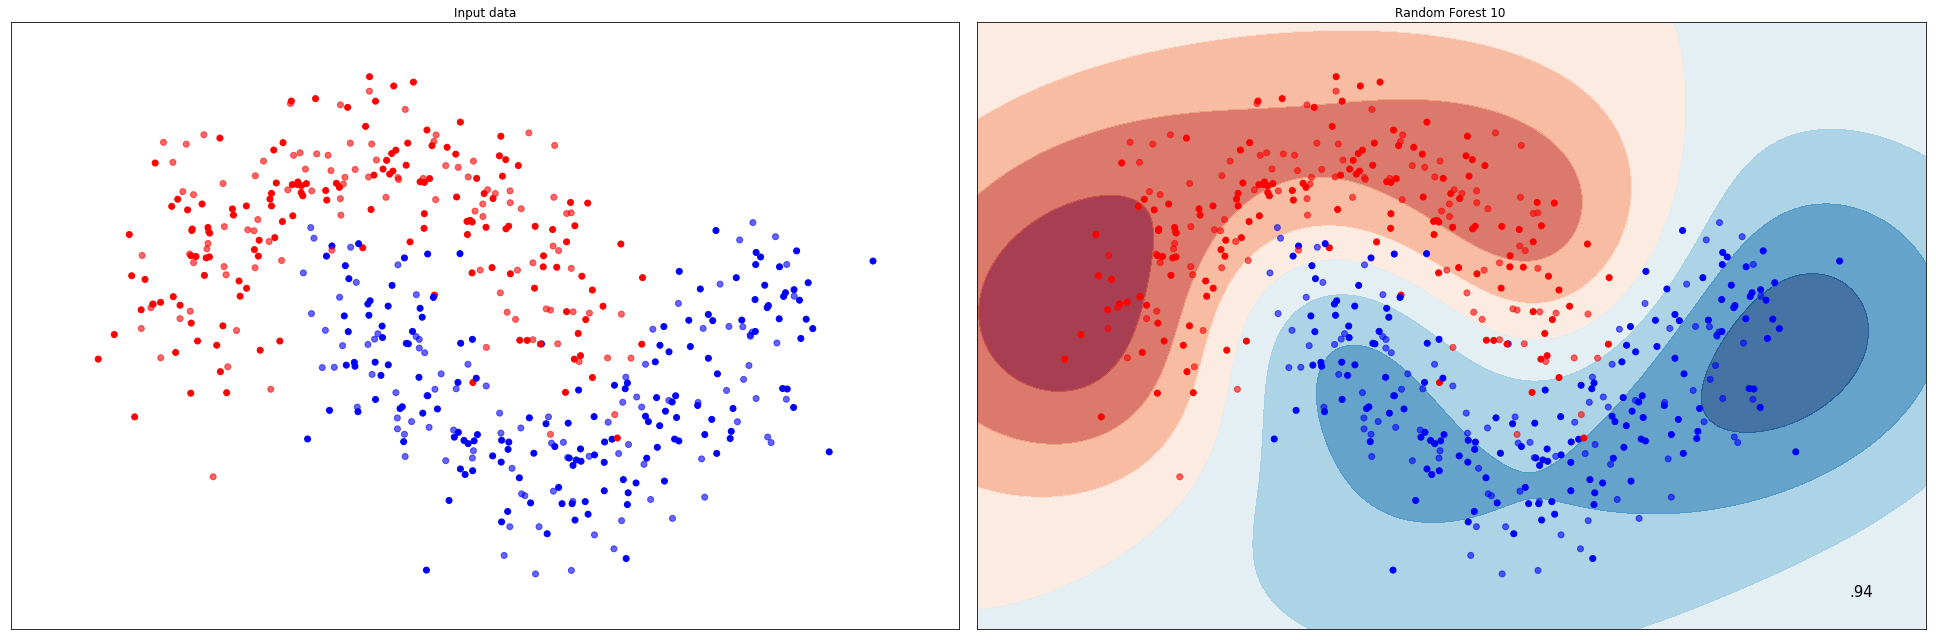

In [20]:
#defining a dictionary of classifier
kernels = {'linear', 'rbf'}
cs = {0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000}

for k in kernels:
    for c in cs:
        print(k, c)

names = ["Random Forest 10 "]
classifiers = [
    
    svm.SVC(kernel="rbf", C=1)]

data = (train_x, train_y)
datasets = [data]

compare(names, classifiers, datasets)